## 这个可以用作数据预处理的模板

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Importing Libraries and Dataset

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
df = pd.read_csv('Train.csv')

In [152]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


## EDA

In [153]:
df.shape

(8068, 11)

In [154]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

Dropping ID Column 

In [155]:
df.drop(['ID'], axis=1)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [156]:
df['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

<AxesSubplot:ylabel='Segmentation'>

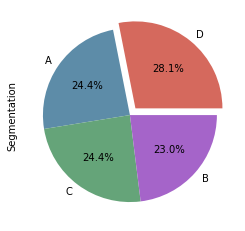

In [157]:
df['Segmentation'].value_counts().plot.pie(
    #labels=['D','B','C','D'], # 设置饼图标签
        colors=["#d5695d", "#5d8ca8", "#65a479", "#a564c9"], # 设置饼图颜色
        explode=(0.1, 0, 0, 0), # 第二部分突出显示，值越大，距离中心越远
        autopct='%.1f%%')# 格式化输出百分比autopct=%0.1f%% )

In [158]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

#### Finding Categorical Data

这类特征通常被称为离散或者分类特征，为object型

In [159]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [160]:
categorical_features = df.select_dtypes(include=[np.object]).columns
print("total categorical_features",len(categorical_features))

total categorical_features 7


In [161]:
df[categorical_features]

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,Male,No,No,Healthcare,Low,Cat_4,D
1,Female,Yes,Yes,Engineer,Average,Cat_4,A
2,Female,Yes,Yes,Engineer,Low,Cat_6,B
3,Male,Yes,Yes,Lawyer,High,Cat_6,B
4,Female,Yes,Yes,Entertainment,High,Cat_6,A
...,...,...,...,...,...,...,...
8063,Male,No,No,NaN,Low,Cat_1,D
8064,Male,No,No,Executive,Low,Cat_4,D
8065,Female,No,Yes,Healthcare,Low,Cat_6,D
8066,Female,No,Yes,Healthcare,Low,Cat_6,B


In [162]:
df['Gender'].value_counts()

Male      4417
Female    3651
Name: Gender, dtype: int64

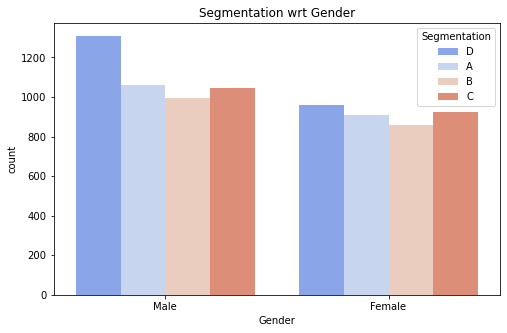

In [163]:
plt.figure(figsize=(8,5))
f1=sns.countplot(x='Gender',hue='Segmentation',data=df,palette='coolwarm')
plt.title("Segmentation wrt Gender")
plt.show()
fig = f1.get_figure()
fig.savefig('1.png', dpi = 400)


In [164]:
df['Ever_Married'].value_counts()

Yes    4643
No     3285
Name: Ever_Married, dtype: int64

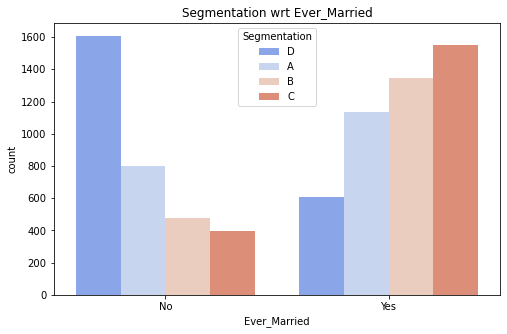

In [165]:
plt.figure(figsize=(8,5))
f2=sns.countplot(x='Ever_Married',hue='Segmentation', data=df, palette='coolwarm')#这个颜色简直丑死。
plt.title("Segmentation wrt Ever_Married")
plt.show()
fig = f2.get_figure()
fig.savefig('2.png', dpi = 400)

Married people are mostly part of segmentation C, whereas unmarried people are mostly part of segmentation D

In [166]:
df['Graduated'].value_counts()

Yes    4968
No     3022
Name: Graduated, dtype: int64

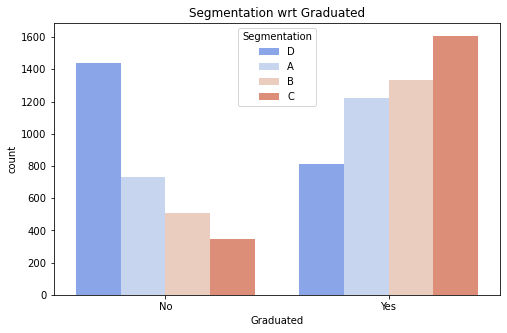

In [167]:
plt.figure(figsize=(8,5))
f3=sns.countplot(x='Graduated',hue='Segmentation', data=df, palette='coolwarm')
plt.title("Segmentation wrt Graduated")
plt.show()
fig = f3.get_figure()
fig.savefig('3.png', dpi = 400)

Graduated People are mostly part of Segmentation C, whereas Non-graduates are mostly part of segmenation D

In [168]:
df['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

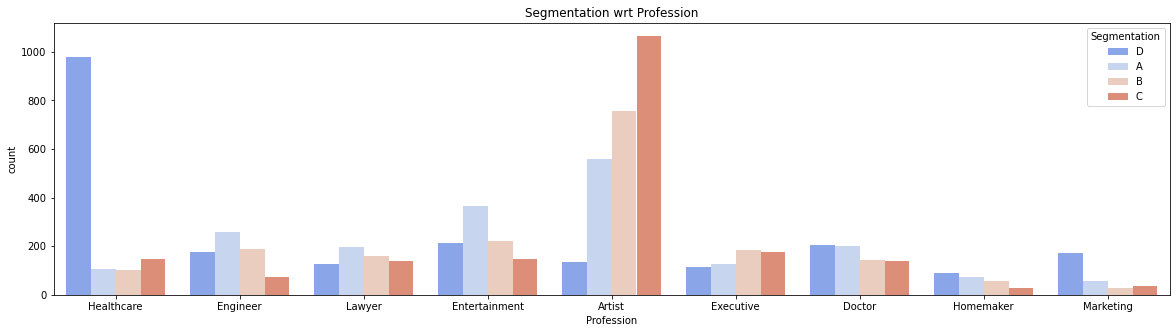

In [169]:
plt.figure(figsize=(20,5))
f4=sns.countplot(x='Profession',hue='Segmentation', data=df, palette='coolwarm')
plt.title("Segmentation wrt Profession")
plt.show()
fig = f4.get_figure()
fig.savefig('4.png', dpi = 400)

Healthcare Workers are mostly part of Segmentation D

In [170]:
df['Spending_Score'].value_counts()

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

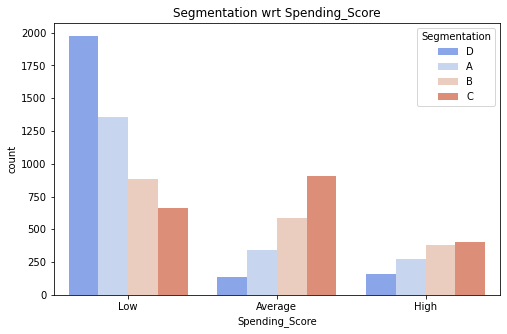

In [171]:
plt.figure(figsize=(8,5))
f5=sns.countplot(x='Spending_Score',hue='Segmentation', data=df, palette='coolwarm')
plt.title("Segmentation wrt Spending_Score")
plt.show()
fig = f5.get_figure()
fig.savefig('5.png', dpi = 400)

People with low spending score are mostly part of Segmentation D

In [172]:
df['Var_1'].value_counts()

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64

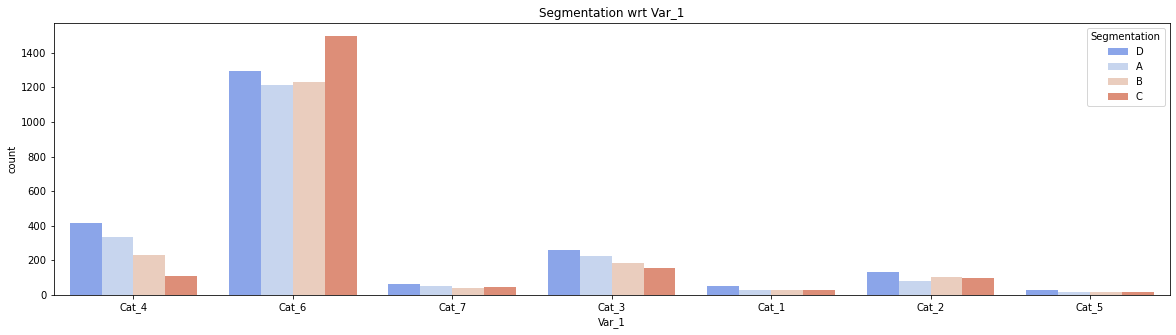

In [173]:
plt.figure(figsize=(20,5))
f6=sns.countplot(x='Var_1',hue='Segmentation', data=df, palette='coolwarm')
plt.title("Segmentation wrt Var_1")
plt.show()
fig = f6.get_figure()
fig.savefig('6.png', dpi = 400)

In [174]:
df['Family_Size'].value_counts()

2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64

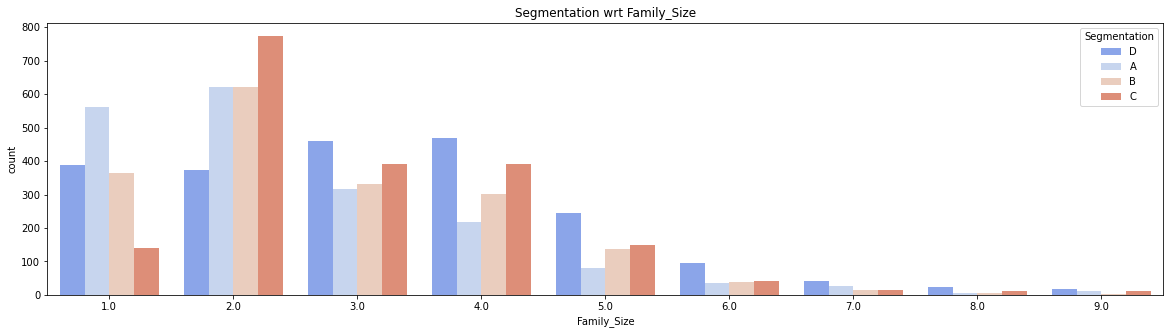

In [175]:
plt.figure(figsize=(20,5))
f7=sns.countplot(x='Family_Size',hue='Segmentation', data=df, palette='coolwarm')
plt.title("Segmentation wrt Family_Size")
plt.show()
fig = f7.get_figure()
fig.savefig('7.png', dpi = 400)

### Encoding Categorical Data

In [176]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [177]:
df = df.drop(['ID'], axis=1)

In [178]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [179]:
# Replacing Male with 0 and Female with 1 in Gender column
df['Gender'] = df['Gender'].replace({'Male':0,'Female':1})

In [180]:
# Replacing No with 0 and Yes with 1 in Ever_Married column
df['Ever_Married'] = df['Ever_Married'].replace({'No':0,'Yes':1})

In [181]:
# Replacing No with 0 and Yes with 1 in Graduated column
df['Graduated'] = df['Graduated'].replace({'No':0,'Yes':1})

In [182]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0.0,22,0.0,Healthcare,1.0,Low,4.0,Cat_4,D
1,1,1.0,38,1.0,Engineer,NaN,Average,3.0,Cat_4,A
2,1,1.0,67,1.0,Engineer,1.0,Low,1.0,Cat_6,B
3,0,1.0,67,1.0,Lawyer,0.0,High,2.0,Cat_6,B
4,1,1.0,40,1.0,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,0,0.0,22,0.0,NaN,0.0,Low,7.0,Cat_1,D
8064,0,0.0,35,0.0,Executive,3.0,Low,4.0,Cat_4,D
8065,1,0.0,33,1.0,Healthcare,1.0,Low,1.0,Cat_6,D
8066,1,0.0,27,1.0,Healthcare,1.0,Low,4.0,Cat_6,B


In [183]:
df['Spending_Score'].value_counts()

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

In [184]:
# Replacing Low with 0, Average with 1 and High with 2 in Spending_Score column
df['Spending_Score'] = df['Spending_Score'].replace({'Low':0,'Average':1,'High':2})

In [185]:
df['Var_1'].value_counts()

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64

In [186]:
# Replacing Cat_1 with 1, Cat_2 with 2, Cat_3 with 3, Cat4 with 4, Cat_5 with 5, Cat_6 with 6, and Cat_7 with 7 in Var_1 column
df['Var_1'] = df['Var_1'].replace({'Cat_1':0,'Cat_2':1,'Cat_3':2,'Cat_4':3,'Cat_5':4,'Cat_6':5,'Cat_7':6})

In [187]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0.0,22,0.0,Healthcare,1.0,0,4.0,3.0,D
1,1,1.0,38,1.0,Engineer,NaN,1,3.0,3.0,A
2,1,1.0,67,1.0,Engineer,1.0,0,1.0,5.0,B
3,0,1.0,67,1.0,Lawyer,0.0,2,2.0,5.0,B
4,1,1.0,40,1.0,Entertainment,NaN,2,6.0,5.0,A
...,...,...,...,...,...,...,...,...,...,...
8063,0,0.0,22,0.0,NaN,0.0,0,7.0,0.0,D
8064,0,0.0,35,0.0,Executive,3.0,0,4.0,3.0,D
8065,1,0.0,33,1.0,Healthcare,1.0,0,1.0,5.0,D
8066,1,0.0,27,1.0,Healthcare,1.0,0,4.0,5.0,B


In [188]:
df['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [189]:
# Replacing Artist with 0, Healthcare with 1, Entertainment with 2, Engineer with 3, Doctor with 4, Lawyer with 5, Executive with 6, Marketing with 7 and Homemaker with 8 in Var_1 column
df['Profession'] = df['Profession'].replace({'Artist':0,'Healthcare':1,'Entertainment':2,'Engineer':3,'Doctor':4,'Lawyer':5,'Executive':6,'Marketing':7,'Homemaker':8})

In [190]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0.0,22,0.0,1.0,1.0,0,4.0,3.0,D
1,1,1.0,38,1.0,3.0,NaN,1,3.0,3.0,A
2,1,1.0,67,1.0,3.0,1.0,0,1.0,5.0,B
3,0,1.0,67,1.0,5.0,0.0,2,2.0,5.0,B
4,1,1.0,40,1.0,2.0,NaN,2,6.0,5.0,A
...,...,...,...,...,...,...,...,...,...,...
8063,0,0.0,22,0.0,NaN,0.0,0,7.0,0.0,D
8064,0,0.0,35,0.0,6.0,3.0,0,4.0,3.0,D
8065,1,0.0,33,1.0,1.0,1.0,0,1.0,5.0,D
8066,1,0.0,27,1.0,1.0,1.0,0,4.0,5.0,B


In [191]:
df['Profession'].value_counts()

0.0    2516
1.0    1332
2.0     949
3.0     699
4.0     688
5.0     623
6.0     599
7.0     292
8.0     246
Name: Profession, dtype: int64

In [192]:
df['Var_1'].value_counts()

5.0    5238
3.0    1089
2.0     822
1.0     422
6.0     203
0.0     133
4.0      85
Name: Var_1, dtype: int64

In [193]:
df['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [194]:
# Replacing A with 0, B with 1, C with 2 and D with 3 in Spending_Score column
df['Segmentation'] = df['Segmentation'].replace({'A':0,'B':1,'C':2,'D':3})

In [195]:
df['Segmentation'].value_counts()

3    2268
0    1972
2    1970
1    1858
Name: Segmentation, dtype: int64

In [196]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0.0,22,0.0,1.0,1.0,0,4.0,3.0,3
1,1,1.0,38,1.0,3.0,NaN,1,3.0,3.0,0
2,1,1.0,67,1.0,3.0,1.0,0,1.0,5.0,1
3,0,1.0,67,1.0,5.0,0.0,2,2.0,5.0,1
4,1,1.0,40,1.0,2.0,NaN,2,6.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...
8063,0,0.0,22,0.0,NaN,0.0,0,7.0,0.0,3
8064,0,0.0,35,0.0,6.0,3.0,0,4.0,3.0,3
8065,1,0.0,33,1.0,1.0,1.0,0,1.0,5.0,3
8066,1,0.0,27,1.0,1.0,1.0,0,4.0,5.0,1


### Filling missing data 

In [197]:
df.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [198]:
#df['Ever_Married'].fillna(int(df['Ever_Married'].mean()), inplace=True)
df['Ever_Married'].fillna(method='ffill', inplace=True)#使用前面最后一个有效值进行缺失值的填充，'bfill'使用后面第一个有效值进行填充

In [199]:
df['Ever_Married'].value_counts()

1.0    4722
0.0    3346
Name: Ever_Married, dtype: int64

In [200]:
#df['Graduated'].fillna(int(df['Graduated'].mean()), inplace=True)
df['Graduated'].fillna(method='ffill', inplace=True)
df['Profession'].fillna(int(df['Profession'].mean()), inplace=True)
df['Work_Experience'].fillna(int(df['Work_Experience'].mean()), inplace=True)
df['Family_Size'].fillna(int(df['Family_Size'].mean()), inplace=True)
df['Var_1'].fillna(int(df['Var_1'].mean()), inplace=True)

In [201]:
df.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

## Splitting Dataset into Training and Testing Set

In [202]:
X = df.iloc[:, :-1].values#excluding the last column
y = df.iloc[:, -1].values#最后一列

In [203]:
print(X)
print(y)

[[ 0.  0. 22. ...  0.  4.  3.]
 [ 1.  1. 38. ...  1.  3.  3.]
 [ 1.  1. 67. ...  0.  1.  5.]
 ...
 [ 1.  0. 33. ...  0.  1.  5.]
 [ 1.  0. 27. ...  0.  4.  5.]
 [ 0.  1. 37. ...  1.  3.  3.]]
[3 0 1 ... 3 1 1]


In [204]:
from sklearn.model_selection import train_test_split

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [206]:
len(X_train[0])

9

## Training the Random Forest Classification model on Training Set

In [75]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

## Predicting Test Set Result

In [76]:
y_pred = classifier.predict(X_test)

In [253]:
print(X_test)

[[ 0.  1. 49. ...  0.  1.  2.]
 [ 0.  1. 45. ...  0.  4.  3.]
 [ 1.  1. 53. ...  1.  3.  5.]
 ...
 [ 0.  1. 39. ...  1.  2.  5.]
 [ 0.  1. 41. ...  1.  4.  5.]
 [ 1.  1. 42. ...  1.  3.  5.]]


## Making Confusion Matrix

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[214 124  58 122]
 [126 156 122  53]
 [ 61 116 226  62]
 [ 99  53  29 396]]


0.4918195339613287

In [79]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import accuracy_score, classification_report

In [80]:
#models
log_clf = LogisticRegression(solver = 'liblinear')
svc_clf = SVC()
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
#knn_clf.fit(X_train, y_train)

In [81]:
# first check the accuracy score on without scalled features
for clf in [log_clf, svc_clf, knn_clf, dt_clf, rf_clf]:
    clf.fit(X_train, y_train)
    
    pred = clf.predict(X_test)
    
    print(clf.__class__.__name__, " ", accuracy_score(y_test,pred))

LogisticRegression   0.46851760039662865
SVC   0.458601883986118
KNeighborsClassifier   0.45314823996033715
DecisionTreeClassifier   0.4392662369856222
RandomForestClassifier   0.49082796232027764


In [83]:
from xgboost import XGBClassifier

xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=5,
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=1, n_estimators=500, n_jobs=4,
              nthread=None, objective='multi:softprob', eval_metric='mlogloss', use_label_encoder=False,
              random_state=0,reg_alpha=0, reg_lambda=1, scale_pos_weight=None, seed=None,
              silent=None, subsample=0.8, verbosity=None)

xgb.fit(X_train, y_train)

prediction = xgb.predict(X_test)

print("accuracy: ",accuracy_score(y_test,prediction))

accuracy:  0.5438770451165097


Thus, we get accuracy of 50.55% using XGBClassifier


In [84]:
xgb.feature_importances_

array([0.04437872, 0.16815127, 0.17591962, 0.11796008, 0.14572386,
       0.04250482, 0.1834344 , 0.07159045, 0.05033674], dtype=float32)

In [98]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(    boosting_type='gbdt', 
                           max_depth=5, 
                           learning_rate=0.01, 
                           objective='multiclass', # Multi Class Classification
                           n_estimators=1000,
                           n_jobs=-1 )

In [99]:
Lgbm = model.fit(X_train, y_train)
valid_accuracy = Lgbm.score(X_test, y_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [100]:
accuracy = valid_accuracy
print(accuracy)
print("LGBM Accuracy: %.2f%%" % (accuracy * 100.0))

0.5364402578086267
LGBM Accuracy: 53.64%


In [298]:
class Customer:
    #初始化客户信息
    def init(self, gender,marriage,age,graduation,profession,work,spending,family,var_1,segmentation):
        self.Gender=gender
        self.Ever_Married=marriage
        self.Age=age
        self.Graduated=graduation
        self.Profession=profession
        self.Work_Experience=work
        self.Spending_Score=spending
        self.Family_Size=family
        self.Var_1=var_1
        self.Segmentation=segmentation
        if not isinstance(profession, str): raise TypeError('需要输入字符型')
        if not isinstance(spending, str): raise TypeError('请在low,average,high中选择')
        if not isinstance(age,int): raise TypeError('年龄为整数型')
        if not isinstance(work,int): raise TypeError('工作经验为整数型')
        if not isinstance(family,int): raise TypeError('工作经验为整数型')
        if marriage not in ['Yes','No']:raise ValueError('请输入Yes or No')
        if graduation not in ['Yes','No']:raise ValueError('请输入Yes or No')
        if age < 15 or age > 100: raise ValueError('are you kidding')
    #打印客户信息
    def printinfo(self):
        print("Hello, world!\n Gender: {}.\n Ever_Married: {}.\n Age: {}.\n Graduated:{}.\n Profession:{}.\n Work_Experience:{}.\n Spending_Score:{}.\n Family_Size:{}.\n Var_1:{}.\n Segmentation:{}".format(self.Gender,self.Ever_Married,self.Age,self.Graduated,self.Profession,self.Work_Experience,self.Spending_Score,self.Family_Size,self.Var_1,self.Segmentation) )
    #随机森林
    def rf_pre(self,xtrain,ytrain):
        customer_list=[]
        ll=[self.Gender,self.Ever_Married,self.Age,self.Graduated,self.Profession,self.Work_Experience,self.Spending_Score,self.Family_Size,self.Var_1]
        for i in ll:
            if i in ['No','Male','Artist','Cat_1','Low']:customer_list.append(0)
            elif i in ['Yes','Female','Healthcare','Cat_2','Average']:customer_list.append(1)
            elif i in ['Cat_3','High','Entertainment']:customer_list.append(2)
            elif i in ['Cat_4','Engineer']:customer_list.append(3)
            elif i in ['Cat_5','Doctor']:customer_list.append(4)
            elif i in ['Cat_6','Lawyer']:customer_list.append(5)
            elif i =='Marketing':customer_list.append(7)
            elif i =='Homemaker':customer_list.append(8)
            else:customer_list.append(i)
        #对原始客户信息数据进行处理
        model=RandomForestClassifier()
        model.fit(xtrain,ytrain)
        pred=model.predict((np.array(customer_list)).reshape(1,-1))
        if pred[0]==0:ec='A'
        elif pred[0]==1:ec='B'
        elif pred[0]==2:ec='C'
        elif pred[0]==3:ec='D'
        print('真实值:{}  预测值:{}'.format(self.Segmentation,ec))
        return(self.Segmentation==ec)
    
    #xgb
    def xgb_pre(self,xtrain,ytrain):
        customer_list=[]
        ll=[self.Gender,self.Ever_Married,self.Age,self.Graduated,self.Profession,self.Work_Experience,self.Spending_Score,self.Family_Size,self.Var_1]
        for i in ll:
            if i in ['No','Male','Artist','Cat_1','Low']:customer_list.append(0)
            elif i in ['Yes','Female','Healthcare','Cat_2','Average']:customer_list.append(1)
            elif i in ['Cat_3','High','Entertainment']:customer_list.append(2)
            elif i in ['Cat_4','Engineer']:customer_list.append(3)
            elif i in ['Cat_5','Doctor']:customer_list.append(4)
            elif i in ['Cat_6','Lawyer']:customer_list.append(5)
            elif i =='Marketing':customer_list.append(7)
            elif i =='Homemaker':customer_list.append(8)
            else:customer_list.append(i)
        #print(ll)
        model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=5,
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=1, n_estimators=500, n_jobs=4,
              nthread=None, objective='multi:softprob', eval_metric='mlogloss', use_label_encoder=False,
              random_state=0,reg_alpha=0, reg_lambda=1, scale_pos_weight=None, seed=None,
              silent=None, subsample=0.8, verbosity=None)
        model.fit(xtrain,ytrain)
        pred=model.predict((np.array(customer_list)).reshape(1,-1))
        if pred[0]==0:ec='A'
        elif pred[0]==1:ec='B'
        elif pred[0]==2:ec='C'
        elif pred[0]==3:ec='D'
        print('真实值:{}  预测值:{}'.format(self.Segmentation,ec))
        return(self.Segmentation==ec)

    #lgb
    def lgb_pre(self,xtrain,ytrain):
        customer_list=[]
        ll=[self.Gender,self.Ever_Married,self.Age,self.Graduated,self.Profession,self.Work_Experience,self.Spending_Score,self.Family_Size,self.Var_1]
        for i in ll:
            if i in ['No','Male','Artist','Cat_1','Low']:customer_list.append(0)
            elif i in ['Yes','Female','Healthcare','Cat_2','Average']:customer_list.append(1)
            elif i in ['Cat_3','High','Entertainment']:customer_list.append(2)
            elif i in ['Cat_4','Engineer']:customer_list.append(3)
            elif i in ['Cat_5','Doctor']:customer_list.append(4)
            elif i in ['Cat_6','Lawyer']:customer_list.append(5)
            elif i =='Marketing':customer_list.append(7)
            elif i =='Homemaker':customer_list.append(8)
            else:customer_list.append(i)
        model= LGBMClassifier(
                                   boosting_type='gbdt', 
                                   max_depth=15, 
                                   learning_rate=0.1, 
                                   objective='multiclass', # Multi Class Classification
                                   random_state=100,  
                                   n_estimators=1000 ,
                                   reg_alpha=0, 
                                   reg_lambda=1, 
                                   n_jobs=-1)
        model.fit(xtrain,ytrain)
        pred=model.predict((np.array(customer_list)).reshape(1,-1))
        if pred[0]==0:ec='A'
        elif pred[0]==1:ec='B'
        elif pred[0]==2:ec='C'
        elif pred[0]==3:ec='D'
        print('真实值:{}  预测值:{}'.format(self.Segmentation,ec))
        return(self.Segmentation==ec)

In [286]:
test= pd.read_csv('Test.csv')
sub = pd.read_csv('sample_submission.csv')

In [299]:
jone=Customer()
gender,marriage,age,graduation,profession,work,spending,family,var_1,segmentation=test.iloc[0,1],test.iloc[0,2],int(test.iloc[0,3]),test.iloc[0,4],test.iloc[0,5],int(test.iloc[0,6]),test.iloc[0,7],int(test.iloc[0,8]),test.iloc[0,9],sub.iloc[0,1]
jone.init(gender,marriage,age,graduation,profession,work,spending,family,var_1,segmentation)


In [288]:
jone.printinfo()

Hello, world!
 Gender: Female.
 Ever_Married: Yes.
 Age: 36.
 Graduated:Yes.
 Profession:Engineer.
 Work_Experience:0.
 Spending_Score:Low.
 Family_Size:1.
 Var_1:Cat_6.
 Segmentation:A


In [300]:
jone.rf_pre(X_train,y_train)

真实值:A  预测值:B


False

In [301]:
jone.xgb_pre(X_train,y_train)

真实值:A  预测值:A


True

In [291]:
jone.lgb_pre(X_train,y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
真实值:A  预测值:A


True

In [258]:
l=[1,2,3]
lll=np.array(l)
lll.reshape(1,-1)

array([[1, 2, 3]])

In [302]:
jone=Customer()
gender,marriage,age,graduation,profession,work,spending,family,var_1,segmentation=test.iloc[0,1],test.iloc[0,2],test.iloc[0,3],test.iloc[0,4],test.iloc[0,5],int(test.iloc[0,6]),test.iloc[0,7],int(test.iloc[0,8]),test.iloc[0,9],sub.iloc[0,1]
jone.init(gender,marriage,age,graduation,profession,work,spending,family,var_1,segmentation)


TypeError: 年龄为整数型